In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:

def generate_data(n):
    std=0.5
    bananas_width= np.random.normal(4,std,n)
    bananas_length=np.random.normal(8,std,n)

    apple_width=np.random.normal(6,std,n)
    apple_length=np.random.normal(6,std,n)

    orange_width=np.random.normal(8,std,n)
    orange_length=np.random.normal(8,std,n)

    width=np.concatenate((bananas_width,apple_width,orange_width))
    length=np.concatenate((bananas_length,apple_length,orange_length))

    X=np.array([width,length]).T

    bananas_label=np.zeros(n,dtype='int')
    apple_label=np.ones(n,dtype='int')
    orange_label=np.ones(n,dtype='int')+1

    Y=np.concatenate((bananas_label,apple_label,orange_label))

    return X,Y

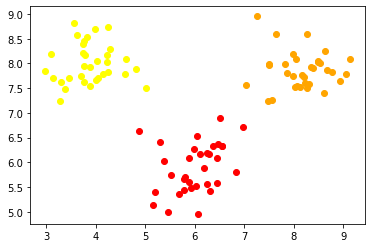

In [52]:
n=int(100/3)
X_train,Y_train=generate_data(n)
plt.scatter(X_train[:n,0],X_train[:n,1],c='yellow')
plt.scatter(X_train[n:2*n,0],X_train[n:2*n,1],c='red')
plt.scatter(X_train[2*n:,0],X_train[2*n:,1],c='orange')

# KNN

In [53]:
class KNearestNeighbors:
    def __init__(self,k):
        self.k=k
    #train
    def fit(self,x_train,y_train):
        self.x_train=x_train
        self.y_train=y_train
        self.number_class=len(np.unique(y_train))
    def nearneighbors(self,x_test):
        distance=np.sqrt(np.sum((x_test-self.x_train)**2,axis=1))
        near_neighbors=np.argsort(distance)[:self.k]
        return near_neighbors
    
    #test
    def predict(self,x_test):
        near_neighbors=self.nearneighbors(x_test)
        y=np.argmax(np.bincount(self.y_train[near_neighbors]))
        return y
    
    def evaluate(self,x_test,y_test):
        self.x_test=x_test
        self.y_test=y_test
        y_pred=np.zeros(len(self.x_test))
        for i , test in enumerate(self.x_test):
            y_pred[i]=self.predict(test)
        evoluatation=(y_pred==self.y_test).sum()/len(self.y_test)
        
        return "Accuracy :",evoluatation
    

In [54]:
knn = KNearestNeighbors(k=5)
# X_train ,X_test,Y_train,Y_test=train_test_split(X,Y,,test_size=0.25,random_state=42)
knn.fit(X_train,Y_train)

X_test,Y_test=generate_data(n)
knn.evaluate(X_test,Y_test)

('evoluatation :', 0.9797979797979798)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train,Y_train)
prediction=neigh.predict(X_test)
evoluatation=(prediction==Y_test).sum()/len(Y_test)
print(evoluatation)

0.9797979797979798


In [56]:
fruit_new = np.array([4.7,6.8])
y_pred = knn.predict(fruit_new)
print(y_pred)

1


In [47]:
fruit = {0:'موز', 
        1:"سیب"}
print(fruit[y_pred])

موز


In [48]:
fruit_new = np.array([8,7])
y_pred = knn.predict(fruit_new)
print(y_pred)
fruit = {0:'موز', 
        1:"سیب",
        2:'پرتقال'}
print(fruit[y_pred])

2
پرتقال
